In [2]:
%matplotlib inline

import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
markers = ('s', 'x', 'o')
cmap = ListedColormap(('red', 'blue', 'green'))

In [4]:
x = np.arange(0, 5)

x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.01),np.arange(x2_min, x2_max, 0.01))

IndexError: too many indices for array

In [6]:
import numpy as np
x = np.arange(0, 5)
x1_mesh, x2_mesh = np.meshgrid(x,x)
print(x1_mesh.ravel())
print(x2_mesh.ravel())


[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


In [7]:
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

In [8]:
#
# 決定境界プロット関数
#
def plot_decision_regions(x, y, model, resolution=0.01):

    ## 今回は被説明変数が3クラスのため散布図のマーカータイプと3種類の色を用意
    ## クラスの種類数に応じて拡張していくのが良いでしょう
    markers = ('s', 'x', 'o')
    cmap = ListedColormap(('red', 'blue', 'green'))

    ## 2変数の入力データの最小値から最大値まで引数resolutionの幅でメッシュを描く
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                   np.arange(x2_min, x2_max, resolution))

    ## メッシュデータ全部を学習モデルで分類
    z = model.predict(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T)
    z = z.reshape(x1_mesh.shape)

    ## メッシュデータと分離クラスを使って決定境界を描いている
    plt.contourf(x1_mesh, x2_mesh, z, alpha=0.4, cmap=cmap)
    plt.xlim(x1_mesh.min(), x1_mesh.max())
    plt.ylim(x2_mesh.min(), x2_mesh.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolors='black',
                    marker=markers[idx],
                    label=cl)

In [9]:
#
# データの取得
#
data = datasets.load_iris()
x_data = data.data
y_data = data.target

In [10]:
# 2変数だけを抽出
x_data = x_data[:, [0,1]]

In [11]:
# 入力データの各変数が平均0,標準偏差1になるように正規化
# 各アルゴリズムのプロット結果を比較しやすいように予め全入力データを正規化
sc = StandardScaler()
sc.fit(x_data)
x_data = sc.transform(x_data)

In [12]:
# データを学習用/テスト用に分割している
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.2)

In [13]:
#
# 機械学習アルゴリズムの定義
#
lr = LogisticRegression(C=10)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', C=1.0)
dc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
rf = RandomForestClassifier(criterion='entropy',
                            n_estimators=10)

models = [lr, knn, svm, dc, rf]
model_names = ['logistic regression',
               'k nearest neighbor',
               'svm',
               'decision tree',
               'random forest']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

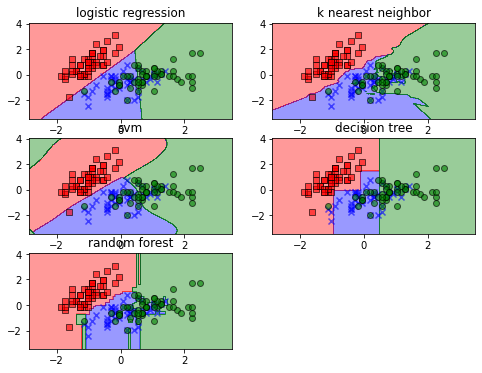

In [14]:
#
# それぞれのモデルにおいて決定境界をプロット
#
plt.figure(figsize=(8,6))
plot_num = 1
for model_name, model in zip(model_names, models):

    plt.subplot(math.ceil(len(models)/2), 2, plot_num)
    # モデルの学習
    model.fit(x_train, y_train)
    # 決定境界をプロット
    plot_decision_regions(x_data, y_data, model)
    plt.title(model_name)
    plot_num += 1

In [15]:

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [18]:
import pandas as pd
df = pd.read_csv("c:/data/LinearBi.csv")

In [19]:
df.head(3)

,Y,X,type
0,0.263750,0.769778,1
1,0.049130,0.810317,1
2,0.327013,0.760773,1


In [21]:
rf.fit(df.X, df.Y)

ValueError: Expected 2D array, got 1D array instead:
array=[0.76977754 0.81031734 0.7607731  0.8951901  0.53835726 1.
 0.70903033 0.7751118  0.6915124  0.8000903  0.73168373 0.9378696
 0.6574791  0.7792507  0.965688   0.7211938  0.7824777  0.80549246
 0.59044474 0.6059519  0.46558297 0.8273011  0.7850079  0.61146766
 0.725227   0.6104568  0.7664435  0.53364706 0.43315083 0.41138303
 0.5268623  0.32908165 0.61220765 0.17590813 0.56764    0.34591818
 0.31592926 0.5110873  0.5383532  0.6552764  0.37066707 0.59979665
 0.47899157 0.5872269  0.13117471 0.60681856 0.47713792 0.6245181
 0.37913647 0.28047407 0.23517108 0.28944314 0.09567535 0.13314666
 0.13189216 0.2678793  0.21849914 0.10645479 0.         0.2294122
 0.30529934 0.27538496 0.18567087 0.16182534 0.07898031 0.13256587
 0.21810046 0.2715944  0.21944539 0.23679817 0.18284951 0.03239428
 0.16448615 0.09229822 0.1059423 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.